<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

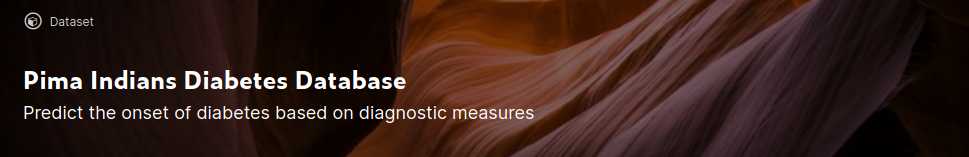

## About the case study

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You can read more about the data [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/pima-indians-diabetes.names)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/bharathkreddy/ML-Bootcamp/master/data/pima-indians-diabetes.data.csv'
                 ,names=['Pregnant','plasma','bp','skin','insulin','bmi','dpf','age','diagnosis'])

In [7]:
df

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age,diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   dpf        768 non-null    float64
 7   age        768 non-null    int64  
 8   diagnosis  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age,diagnosis
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Can plasma, bp, skin, insulin , bmi be zero ? 
### To use missing value treatments - we first have to replace thse Zeros by np.nan
NOTE : we should not replace zeros in entire dataset as the columns - Pregnant and diagnosis can be Zero

In [15]:
for col in df.columns:
    if col not in ['Pregnant','diagnosis']:
        df[col].replace(0,np.nan,inplace=True)

### Lets check if it worked

In [16]:
df.describe()

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age,diagnosis
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### lets see how many of the calues are missing 

In [17]:
df.isna().sum()

Pregnant       0
plasma         5
bp            35
skin         227
insulin      374
bmi           11
dpf            0
age            0
diagnosis      0
dtype: int64

### lets use pipeline to do these steps
1. Impute missing values and fill missing values with mean
2. Scale the data , we are going to use normalizing method ( x - ${\sigma} )/ {\mu} $

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### But before we do anyting remember - we need to split our dataset into test and train

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(['diagnosis'],axis=1) # we need not use inplace = True as we are attaching this dataset to new variable
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
my_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler()),
    ('model',KNeighborsClassifier(n_neighbors=5,weights = 'distance'))
])

In [34]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler()),
                ('model', KNeighborsClassifier(weights='distance'))])

In [39]:
y_train_predict = my_pipeline.predict(X_train)
print('\nTRAINING CLASSIFICATION REPORT\n')
print(classification_report(y_train_predict,y_train))


TRAINING CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [40]:
y_test_predict = my_pipeline.predict(X_test)
print('\nTEST CLASSIFICATION REPORT\n')
print(classification_report(y_test_predict,y_test))


TEST CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        89
           1       0.75      0.63      0.68        65

    accuracy                           0.75       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



# Let's try a few values of k and see how it works.

In [50]:
model_accuracy = []       # define an empty list to store all accuracy scores.
for k in range(1,200):    # Loop through 200 values of K
    my_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler()),
    ('model',KNeighborsClassifier(n_neighbors=k,weights = 'distance'))
    ])
    my_pipeline.fit(X_train,y_train)
    y_predict = my_pipeline.predict(X_test)
    model_accuracy.append(accuracy_score(y_predict,y_test)) # run the pipeline 200 times and keep calculating accuracy scores
    

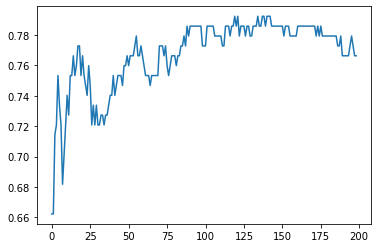

In [51]:
plt.plot(model_accuracy)

In [52]:
max(model_accuracy) # MAX accuracy

0.7922077922077922

In [60]:
np.array(model_accuracy).argmax()   # numpy as argmax function wich gives position of largest value
# we convert our list to numpy array and get the position of largest value
# this is the value of K for which our model has highest accuracy

119

In [55]:
sum(model_accuracy)/len(model_accuracy) # MEAN ACCURACY 

0.7673758402401643

# END OF NOTEBOOK